<a href="https://colab.research.google.com/github/Shooleralbany/-home11-grad-2021-sh236571/blob/main/Fe_Mn_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install cartopy
%pip install statsmodels
%pip install pyleoclim
%pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.4/996.4 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 37.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.8/885.8 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pyleoclim as pyleo
import numpy as np

In [6]:
# Access Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [Years CE]', ylabel='FeMn [g]'>)

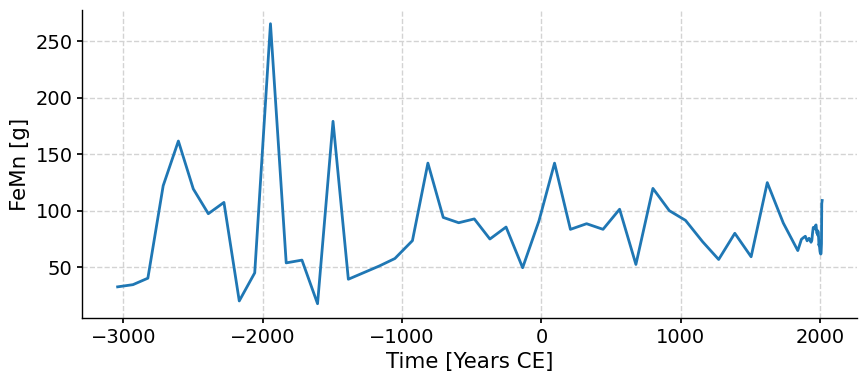

In [17]:
# File directory
data_dir = '/content/drive/MyDrive/Time Series'
# Open the dataset assuming it's a CSV file, change to pd.read_table for TSV files
data = pd.read_csv(data_dir+'/Heart.txt', sep='\t')

#drop all duplicates
#data = data.drop_duplicates('Years CE')

# Convert 'Year' column to string
data['CE'] = data['CE'].astype(str)

# Ensure each year is four digits by padding with zeros as needed
data['CE'] = data['CE'].str.zfill(0000)

#data.Time.is_evenly_spaced()
data_ps = pyleo.Series(time=data['CE'], value=data['FeMn'],
                      time_name='Age', time_unit='Years CE', verbose=False,
                      value_name='FeMn', value_unit=u'g')





data_ps.plot()

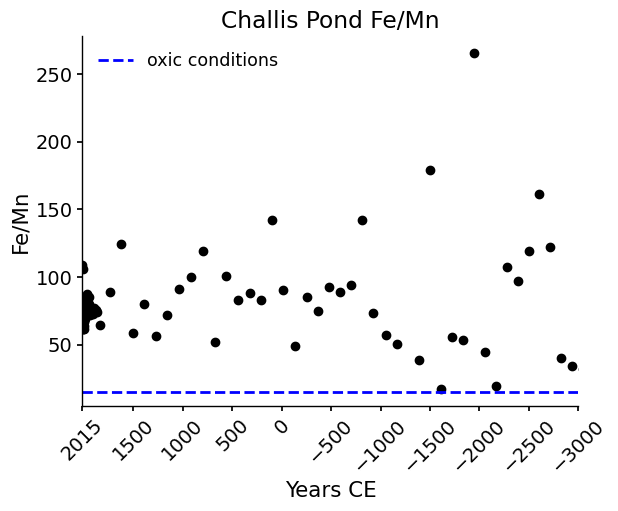

<Figure size 640x480 with 0 Axes>

In [81]:
data_dir = '/content/drive/MyDrive/Time Series'
# Open the dataset assuming it's a CSV file, change to pd.read_table for TSV files
data = pd.read_csv(data_dir+'/Heart.txt', sep='\t')


dates = data['CE'].tolist()
values1 = data['FeMn'].tolist()

# 2. Plotting the data as a line graph
plt.plot(dates, values1 , marker='o', color='black', linestyle='-')

# 3. Customizing the plot
plt.xlabel('Years CE')
plt.ylabel('Fe/Mn')
plt.title('Challis Pond Fe/Mn')
plt.grid(False)

#set limit on x axis
plt.xlim(2015, -3000)

selected_ticks = [2015,1500,1000,500,0,-500,-1000,-1500,-2000,-2500,-3000]  # replace with the specific values you want
plt.xticks(selected_ticks, rotation=45)


# Add a horizontal line at a specific y-value
specific_y_value = 15  # replace with your desired value
plt.axhline(y=specific_y_value, color='b', linestyle='--', label='oxic conditions')
plt.legend()


dates.reverse()

plt.show()
plt.savefig('Challis Fe:Mn.png')




